I am using the **Life Expectancy dataset**, collected by the WHO and the United Nations, assembled and available at: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who. My main goal is to perform Exploratory Data Analysis and draw critical insights from the data.

* **Life expectancy:** measured in years (target variable)
* **Country**
* **Year**
* **Status:** developing or developed country
* **Population:** population of the country
* **Adult mortality:** number of deaths of adults per 1000 population, for both sexes
* **Infant deaths:** number of infant deaths per 1000 population
* **Under-five deaths:** number of under-five deaths per 1000 population
* **GDP:** Gross Domestic Product per capita (in USD)
* **Percentage expenditure:** expenditure on health as a percentage of Gross Domestic Product per capita (%)
* **Total expenditure:** general government expenditure on health as a percentage of total government expenditure (%)
* **Income composition:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Hepatitis B:** hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Polio:** polio (Pol3) immunization coverage among 1-year-olds (%)
* **Diphteria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **Measles:** number of reported cases per 1000 population
* **HIV/AIDS:** deaths per 1000 live births HIV/AIDS (0-4 years)
* **Thinness 5-9:** prevalence of thinness among children and adolescents for age 5 to 9 (%)
* **Thinness 10-19:** prevalence of thinness among children and adolescents for age 10 to 19 (%)
* **BMI:** average Body Mass Index of entire population
* **Alcohol:** recorded per capita (15+) consumption (in litres of pure alcohol)
* **Schooling:** number of years of schooling

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Dataset loading and high level overview

In [2]:
path="Life Expectancy Data.csv"
df=pd.read_csv(path)

In [3]:
df.sample(4)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1906,Nigeria,2002,Developing,47.7,49.0,571,9.61,17.137754,NaN,42007,...,4.0,2.43,25.0,5.3,459.457212,12866671.0,13.8,13.8,0.000,7.7
153,Azerbaijan,2006,Developing,69.2,154.0,6,0.85,105.633726,52.0,222,...,8.0,6.17,78.0,0.1,2473.857760,848455.0,2.9,2.9,0.682,10.7
181,Bahrain,2010,Developing,76.1,73.0,0,1.93,266.769612,99.0,0,...,99.0,3.64,99.0,0.1,2722.138900,NaN,6.0,5.9,0.810,14.4
278,Benin,2009,Developing,58.4,259.0,25,1.16,71.013992,79.0,1461,...,8.0,4.46,79.0,1.6,793.452430,894476.0,7.9,7.8,0.448,9.3


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.drop(columns=['Adult Mortality','infant deaths','under-five deaths ','Polio','Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years'],inplace=True)

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,71.279624,65.0,1154,19.1,8.16,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.01,73.523582,62.0,492,18.6,8.18,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.01,73.219243,64.0,430,18.1,8.13,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.01,78.184215,67.0,2787,17.6,8.52,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.01,7.097109,68.0,3013,17.2,7.87,63.537231,2978599.0,0.454,9.5


In [7]:
df.rename(columns={
    'Life expectancy ':'Life expectancy',
    'percentage expenditure': 'percentage_expenditure',
    'Hepatitis B':'Hepatitis_B',
    'Measles ':'Measles',
    ' BMI ':'BMI',
    'Income composition of resources':'Income_composition_of_resources'

},inplace=True)

In [9]:
cols_with_nulls = df.columns[df.isnull().any()].tolist()
print(f" Columns with missing values : {cols_with_nulls}")

 Columns with missing values : ['Life expectancy', 'Alcohol', 'Hepatitis_B', 'BMI', 'Total expenditure', 'GDP', 'Population', 'Income_composition_of_resources', 'Schooling']


In [10]:
print(f"percentage of missing values : {max(df.isnull().sum())/df.shape[0] * 100 :.2f} %")

percentage of missing values : 22.19 %


## Dealing with missing values

In [11]:
print(f" missing values in 'Life expectancy' is {df['Life expectancy'].isnull().sum()/df.shape[0] * 100:.2f}% \n We can remove corresponding rows")

 missing values in 'Life expectancy' is 0.34% 
 We can remove corresponding rows


In [12]:
df=df[df['Life expectancy'].notnull()]

In [13]:
df['Life expectancy'].isnull().sum()

0

In [14]:
print(f"percentage of missing values in 'Alcohol' is {df['Alcohol'].isnull().sum()/df.shape[0] * 100 :.2f}%")

percentage of missing values in 'Alcohol' is 6.59%


<Axes: >

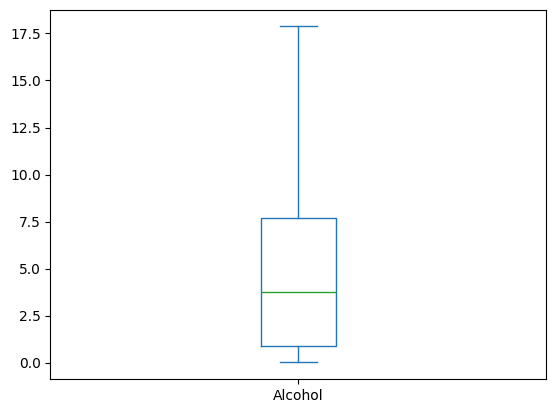

In [15]:
df['Alcohol'].plot(kind='box')

<Axes: xlabel='Alcohol', ylabel='Density'>

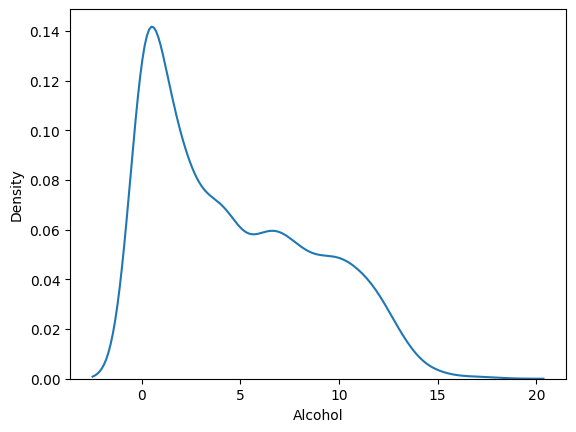

In [16]:
sns.kdeplot(df['Alcohol'])

In [17]:
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(strategy="median")
df['Alcohol'] = imp1.fit_transform(df['Alcohol'].values.reshape(-1, 1))

In [18]:
df['Alcohol'].isnull().sum()

0

In [19]:
print(f"percentage of missing values in 'Hepatitis_B' is {df['Hepatitis_B'].isnull().sum()/df.shape[0] * 100 :.2f}%")

percentage of missing values in 'Hepatitis_B' is 18.89%


In [20]:
df['Hepatitis_B'].describe()

count    2375.000000
mean       80.960842
std        25.018337
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis_B, dtype: float64

<Axes: >

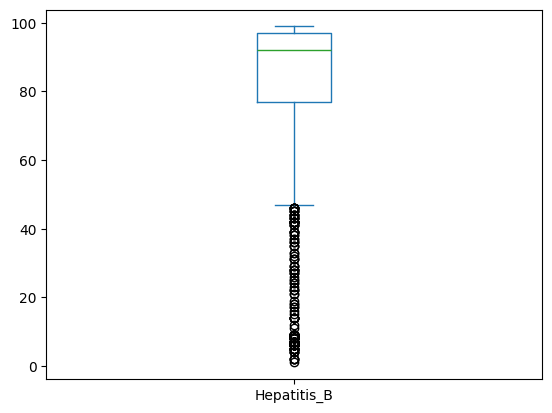

In [21]:
df['Hepatitis_B'].plot(kind='box')

In [22]:
df['Hepatitis_B']=imp1.fit_transform(df['Hepatitis_B'].values.reshape(-1,1))

In [23]:
df['Hepatitis_B'].isnull().sum()

0

In [24]:
print(f"percentage of missing values in 'BMI' is {df['BMI'].isnull().sum()/df.shape[0] * 100 :.2f}%")

percentage of missing values in 'BMI' is 1.09%


In [25]:
df=df[df['BMI'].notnull()]

In [26]:
df['BMI'].isnull().sum()

0

In [27]:
df['Total expenditure'].isnull().sum()

212

<Axes: >

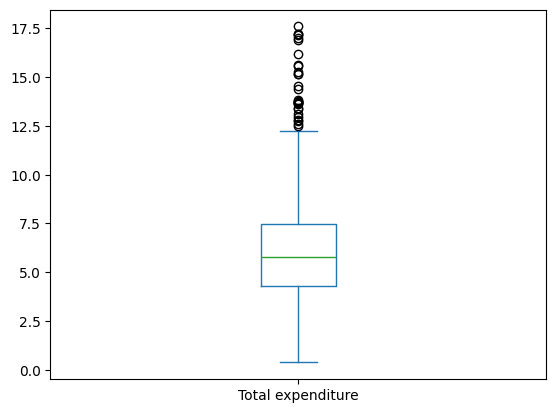

In [28]:
df['Total expenditure'].plot(kind='box')

<Axes: ylabel='Density'>

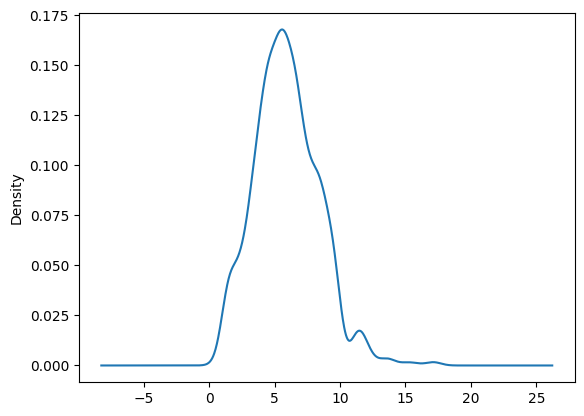

In [29]:
df['Total expenditure'].plot(kind='kde')

In [30]:
imp2=SimpleImputer(strategy="mean")
df['Total expenditure']=imp2.fit_transform(df['Total expenditure'].values.reshape(-1,1))

In [31]:
df['Total expenditure'].isnull().sum()

0

In [32]:
df['GDP'].isnull().sum()

435

<Axes: >

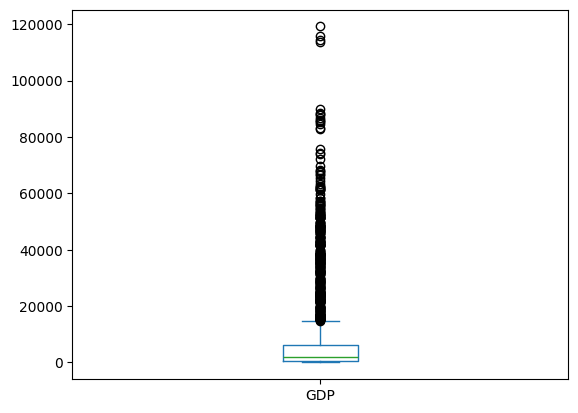

In [33]:
df['GDP'].plot(kind='box')

In [34]:
df['GDP']=imp1.fit_transform(df['GDP'].values.reshape(-1,1))

In [35]:
df['GDP'].isnull().sum()

0

In [36]:
df['Population'].isnull().sum()

644

<Axes: >

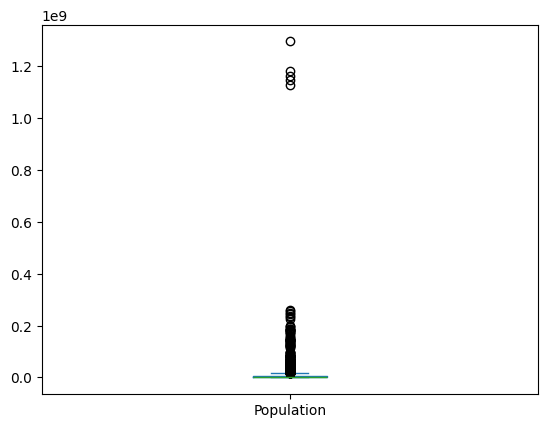

In [37]:
df['Population'].plot(kind='box')

In [38]:
df['Population']=imp1.fit_transform(df['Population'].values.reshape(-1,1))

In [39]:
df['Population'].isnull().sum()

0

<Axes: >

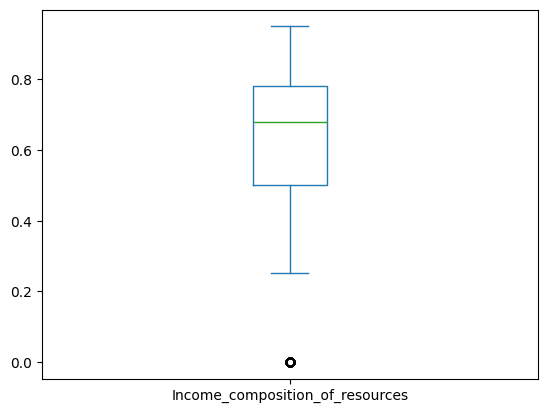

In [40]:
df['Income_composition_of_resources'].plot(kind='box')

In [41]:
df['Income_composition_of_resources']=imp1.fit_transform(df['Income_composition_of_resources'].values.reshape(-1,1))

In [42]:
df['Income_composition_of_resources'].isnull().sum()

0

In [43]:
print(f"percentage of missing values in 'Schooling's is {df['Schooling'].isnull().sum()/df.shape[0] * 100 :.2f}%")

percentage of missing values in 'Schooling's is 5.52%


<Axes: >

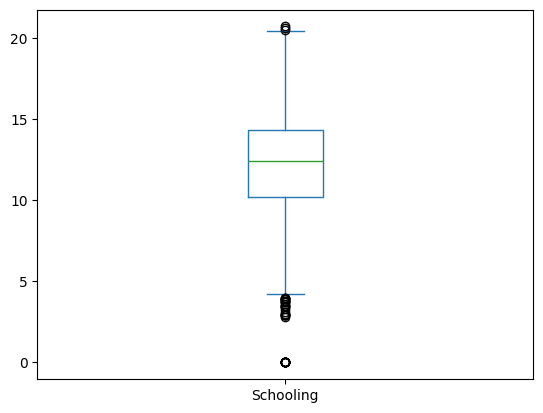

In [44]:
df['Schooling'].plot(kind='box')

In [45]:
df['Schooling']=imp1.fit_transform(df['Schooling'].values.reshape(-1,1))

In [46]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Total expenditure                  0
GDP                                0
Population                         0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

## Detailed EDA

In [47]:
all_cols=df.columns.tolist()
cat_cols=['Country', 'Year', 'Status']
num_cols=['Alcohol','percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Total expenditure', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling']

### Univariate analysis

In [48]:
df.sample(3)

,Country,Year,Status,Life expectancy,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Total expenditure,GDP,Population,Income_composition_of_resources,Schooling
2732,Ukraine,2013,Developing,71.0,8.44,52.425296,46.0,0,6.1,7.67,429.715540,454896.0,0.744,15.2
1607,Maldives,2010,Developing,76.7,1.83,91.139718,97.0,0,22.1,7.93,633.794980,367.0,0.653,11.6
1883,Niger,2009,Developing,57.1,0.11,5.665405,71.0,801,16.9,6.98,341.289462,15813913.0,0.307,4.2


Univariate analysis of Year column


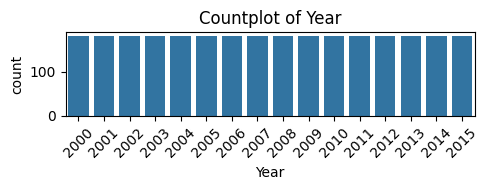

Univariate analysis of Status column


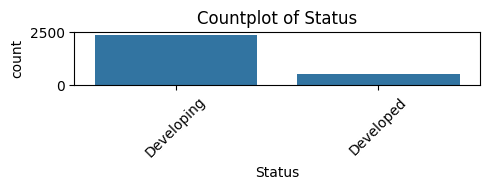

Univariate analysis of Life expectancy column


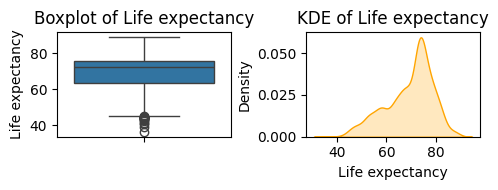

Univariate analysis of Alcohol column


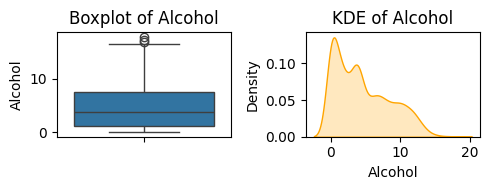

Univariate analysis of percentage_expenditure column


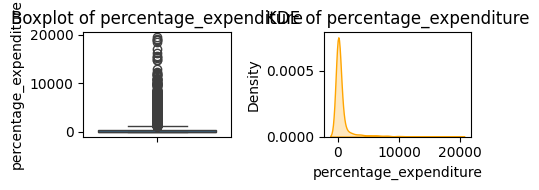

Univariate analysis of Hepatitis_B column


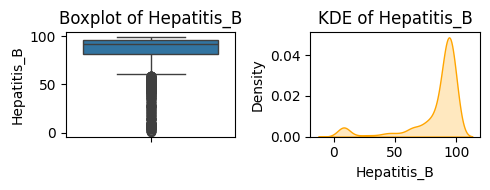

Univariate analysis of Measles column


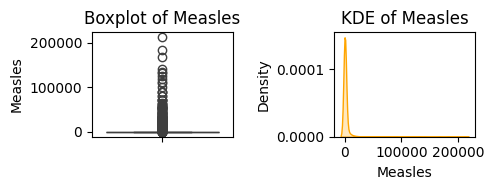

Univariate analysis of BMI column


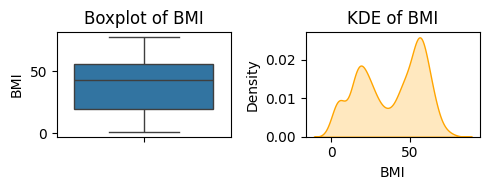

Univariate analysis of Total expenditure column


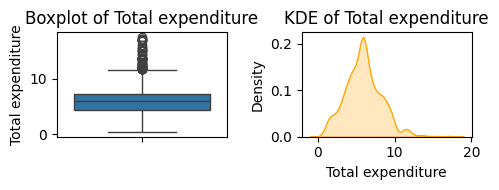

Univariate analysis of GDP column


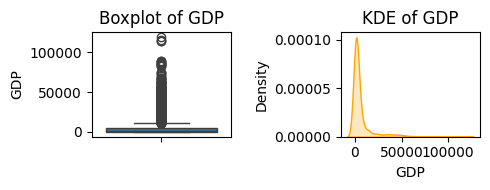

Univariate analysis of Population column


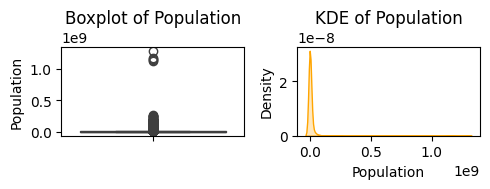

Univariate analysis of Income_composition_of_resources column


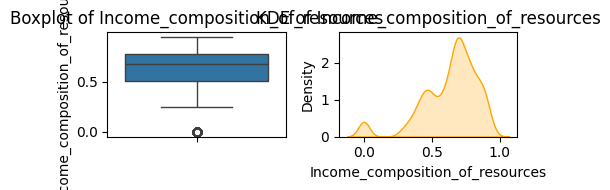

Univariate analysis of Schooling column


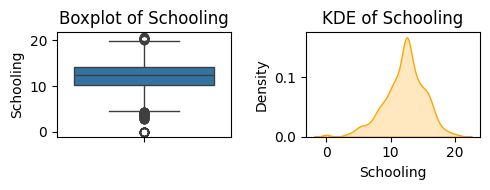

In [49]:
for column in all_cols:
    if column == 'Country':
        continue
    print(f"Univariate analysis of {column} column")

    if column in cat_cols:
        # Single bar chart for categoricals
        plt.figure(figsize=(5, 2))
        sns.countplot(x=column, data=df)
        plt.title(f'Countplot of {column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        # Side-by-side for numerics: boxplot | KDE
        fig, axes = plt.subplots(1, 2, figsize=(5, 2))
        sns.boxplot(y=df[column], ax=axes[0])
        axes[0].set_title(f'Boxplot of {column}')
        sns.kdeplot(x=df[column], fill=True, ax=axes[1], color='orange')
        axes[1].set_title(f'KDE of {column}')
        plt.tight_layout()
        plt.show()


### Bivariate analysis

#### Numerical- numerical

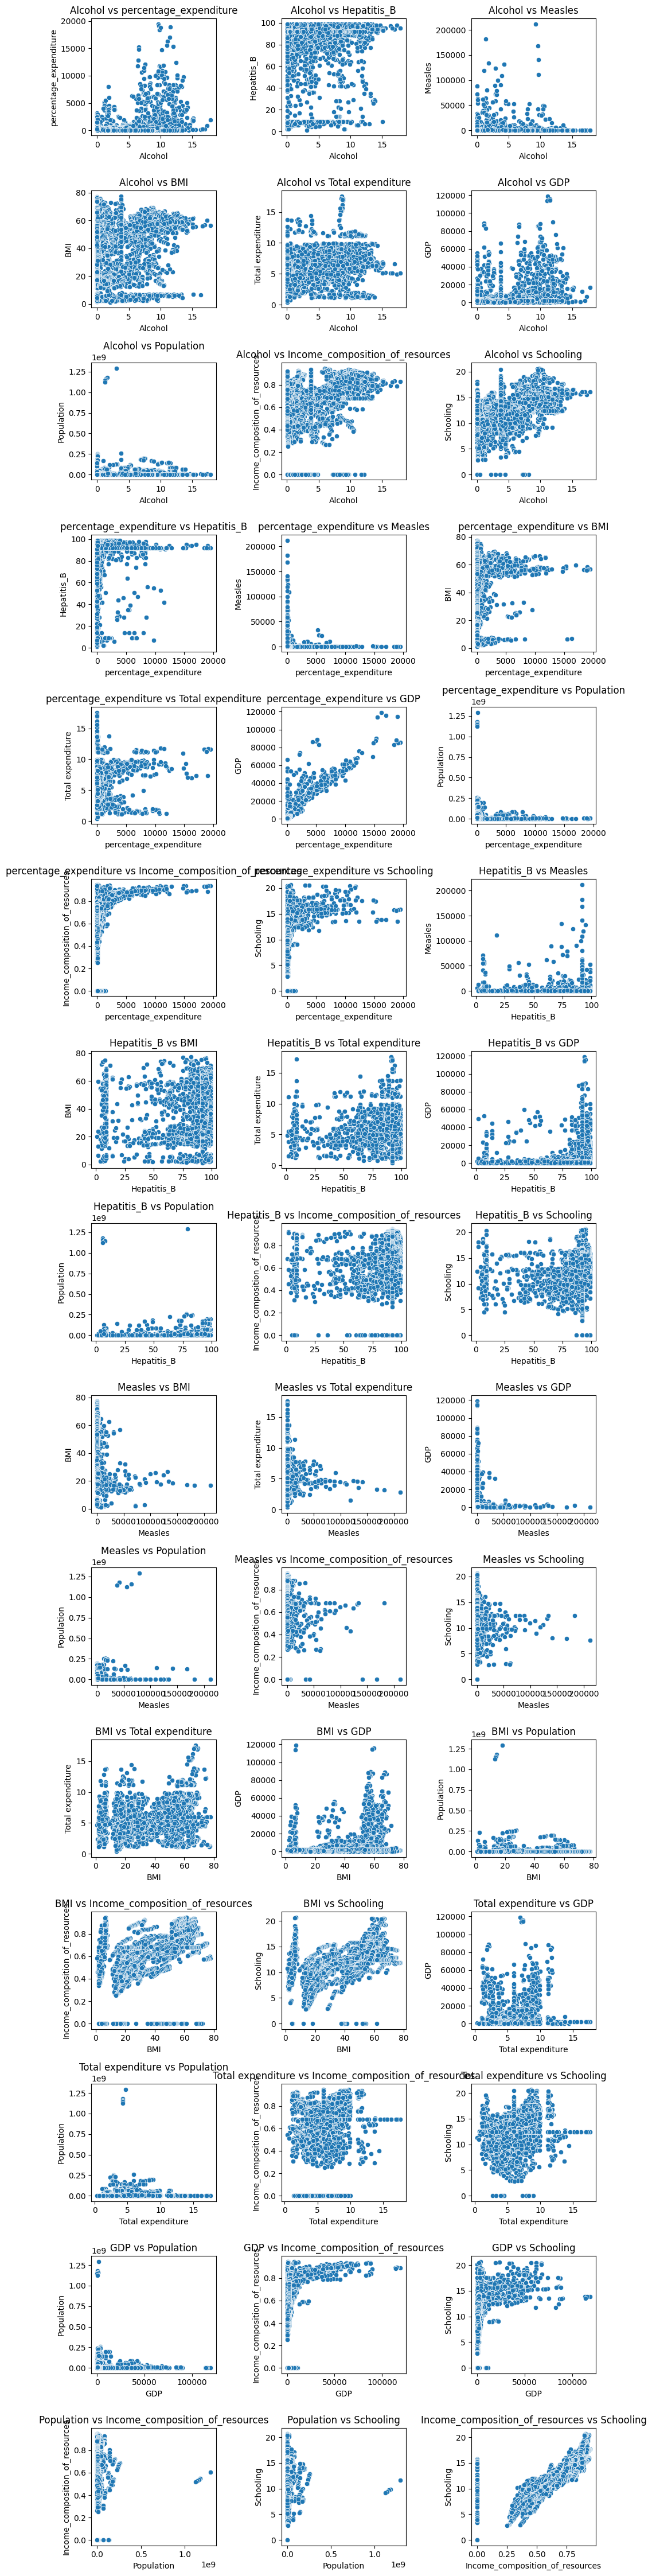

In [50]:
n = len(num_cols)
num_of_fig = math.ceil(n * (n - 1) / 2)

rows = math.ceil(num_of_fig / 3)
fig, axes = plt.subplots(rows, 3, figsize=(10, 3 * rows))  # wider for readability
axes = axes.flatten()

cnt = 0
for i, num1 in enumerate(num_cols):
    for num2 in num_cols[i+1:]:
        if cnt >= len(axes):  # safety guard
            break
        ax = axes[cnt]
        sns.scatterplot(data=df, x=num1, y=num2, ax=ax)
        ax.set_title(f'{num1} vs {num2}')
        cnt += 1

# Hide any unused axes
for j in range(cnt, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


- Alcohol shows no strong correlation with most features. A weak positive relation is seen with BMI, GDP, income composition, and schooling. This suggests higher alcohol consumption tends to appear more in developed countries where BMI, GDP, and education levels are also higher.

- Percentage expenditure on health strongly correlates with total expenditure and GDP. This indicates that as countries grow economically, they tend to allocate a higher percentage of GDP to healthcare.

- Percentage expenditure also shows positive relations with income composition and schooling. Countries with better income equality and higher schooling invest relatively more in healthcare.

- Hepatitis B vaccination coverage shows weak to moderate positive correlations with BMI, total expenditure, income composition, and schooling. This reflects that health infrastructure and immunization programs improve with better economic and social development.

- Measles cases are negatively correlated with GDP, BMI, income composition, and schooling. This indicates that wealthier and more developed countries tend to have fewer measles cases, as better healthcare access and education help reduce outbreaks.

- BMI shows a strong positive relation with income composition and schooling. Higher development and education levels generally correspond to healthier BMI averages.

- Total expenditure has strong positive correlation with GDP, income composition, and schooling. This reflects that government health spending increases with national wealth and human development.

- GDP is strongly positively correlated with percentage expenditure, total expenditure, income composition, and schooling. Higher GDP countries consistently score better on social and health indicators.

- Population does not show meaningful correlation with most features. Large and small population countries are scattered across economic and health measures, suggesting population size alone is not a determinant.

- Income composition and schooling show a very strong positive correlation. Countries with better income equality and resources also have higher average years of schooling, confirming the link between human development factors.

- The most important overall insights are: 
  - GDP, income composition, and schooling form a cluster of strongly correlated features, indicating development level.
  - Health expenditure (both percentage and total) is strongly tied to GDP and development.
  - Vaccination coverage and lower measles incidence improve with GDP, schooling, and income composition.
  - Alcohol consumption and BMI show weak to moderate correlations with development indicators, with stronger signals in developed countries.


<Axes: >

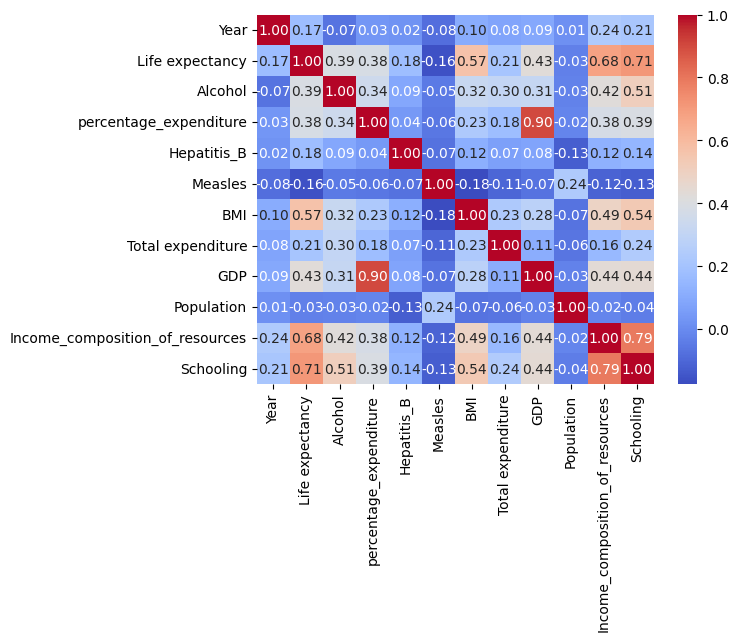

In [68]:
corr=df.select_dtypes(include="number").corr()
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f")

#### Numerical-categorical

<Axes: xlabel='Alcohol', ylabel='BMI'>

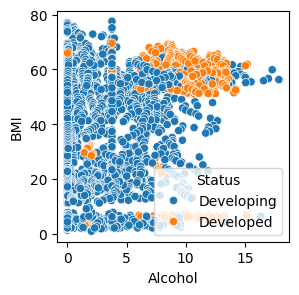

In [51]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=df,x='Alcohol',y='BMI',hue='Status')


 **Alcohol vs BMI (Developing vs Developed Countries)**
- **Developed countries (orange)**: 
  - Clustered at higher **BMI values (50–70)** and **alcohol consumption (5–15 liters)**.  
  - Suggests a **weak positive correlation**: higher alcohol consumption is associated with higher BMI in developed regions.
- **Developing countries (blue)**:
  - Wide spread of BMI values (0–70), but alcohol consumption is mostly **below 10 liters**.  
  - Relationship is **weak or negligible**.  
- **Overall conclusion**:  
  - Globally, the relationship between Alcohol and BMI is weak.  
  - **Subgroup analysis matters** → Developed countries show clearer clustering, while Developing countries do not.  


<Axes: xlabel='GDP', ylabel='percentage_expenditure'>

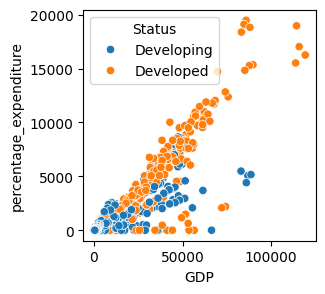

In [52]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=df,x='GDP',y='percentage_expenditure',hue='Status')


**GDP vs Percentage Expenditure (Developing vs Developed Countries)**
- **Clear strong positive correlation** across both groups.  
- **Developed countries (orange)**: 
  - Higher GDP values (30k–100k) align with much higher health expenditure percentages (up to 20,000).  
  - Indicates that wealthier nations **spend more on healthcare relative to GDP**.  
- **Developing countries (blue)**:
  - Lower GDP (mostly <30k) and lower health expenditure.  
  - The trend still holds but at a **smaller scale**.  
- **Overall conclusion**:  
  - There is a **direct proportional relationship** between GDP and healthcare spending, stronger in developed nations.


<Axes: xlabel='BMI', ylabel='Income_composition_of_resources'>

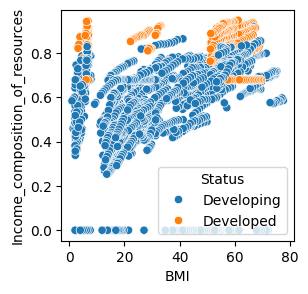

In [53]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=df,x='BMI',y='Income_composition_of_resources',hue='Status')


 **BMI vs Income Composition of Resources (Developing vs Developed Countries)**
- **Developed countries (orange)**: 
  - Cluster around **higher BMI (50–70)** and **higher income composition (0.8–1.0)**.  
  - Indicates that **better economic conditions** are associated with both higher BMI and higher income equality index.
- **Developing countries (blue)**:
  - Much wider BMI range (0–70), but income composition spread is mostly **below 0.8**.  
  - Shows a **positive trend**, but noisier than developed countries.  
- **Overall conclusion**:  
  - There is a **positive correlation**: higher income composition (a proxy for development) tends to be associated with higher BMI.  
  - Stronger and more consistent in developed nations. 


---

**Key Insights**
1. **Alcohol vs BMI** → Weak global correlation; only developed countries show some positive trend.  
2. **GDP vs Percentage Expenditure** → Strong positive correlation; higher GDP directly links to higher healthcare spending.  
3. **BMI vs Income Composition** → Positive correlation; higher economic development is associated with higher BMI, clearer in developed countries.  


In [69]:
df.sample()

,Year,Status,Life expectancy,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Total expenditure,GDP,Population,Income_composition_of_resources,Schooling
593,2014,Developing,63.2,0.01,73.865849,88.0,0,23.7,6.75,852.954379,759385.0,0.497,11.1


In [73]:
df.columns

Index(['Year', 'Status', 'Life expectancy', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Total expenditure', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [88]:
status_spend=df.pivot_table(
    index="Status", # cat column
    values='Total expenditure', # num column
    aggfunc="mean"     # agg function
)
print(status_spend)
diff=status_spend["Total expenditure"]["Developed"]-status_spend["Total expenditure"]["Developing"]
prod=status_spend["Total expenditure"]["Developed"]/status_spend["Total expenditure"]["Developing"] 
print(f"On average, developed countries spend {prod:.2f} times more on health care than developing countries")

            Total expenditure
Status                       
Developed            7.452856
Developing           5.609108
On average, developed countries spend 1.33 times more on health care than developing countries


In [89]:
status_bmi=df.pivot_table(
    index="Status",
    values="BMI",
    aggfunc="mean"
)
print(status_bmi)
prod=(status_bmi["BMI"]["Developed"]-status_bmi["BMI"]["Developing"])/status_bmi["BMI"]["Developing"]  * 100
print(f"Developed countries have {prod:.2f}% higher BMI.")

                  BMI
Status               
Developed   51.803906
Developing  35.321351
Developed countries have 46.66% higher BMI.


## Predictive Analysis

In [54]:
df.drop(columns=['Country'],inplace=True)

In [55]:
df.columns

Index(['Year', 'Status', 'Life expectancy', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Total expenditure', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [56]:
df.sample(2)

,Year,Status,Life expectancy,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Total expenditure,GDP,Population,Income_composition_of_resources,Schooling
2783,2010,Developing,57.5,4.19,0.0,91.0,167,2.7,5.300000,1792.384500,1370539.5,0.679,12.4
1090,2015,Developing,58.9,3.77,0.0,87.0,153,26.3,5.935075,596.871719,177526.0,0.421,9.2


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

cols = [
    'Year', 'Status', 'Alcohol',
    'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
    'Total expenditure', 'GDP', 'Population',
    'Income_composition_of_resources', 'Schooling'
]

cat_cols   = ['Status']                    # categorical
target_col = 'Life expectancy'             # target (excluded from X)
num_cols   = [c for c in cols if c not in cat_cols]


num_pipe = Pipeline(steps=[
    ('scaler',  RobustScaler())
])

cat_pipe = Pipeline(steps=[
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols),
    ],
    remainder='drop',                # or 'passthrough' if you want to keep extras
    verbose_feature_names_out=False
)

In [58]:
from sklearn.model_selection import train_test_split

X = df[cat_cols + num_cols]   # features only
y = df[target_col]            # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
reg = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', Ridge(alpha=1.0, random_state=42))
])

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}   R²: {r2:.3f}')

RMSE: 5.938   R²: 0.610


<Axes: xlabel='Life expectancy', ylabel='Density'>

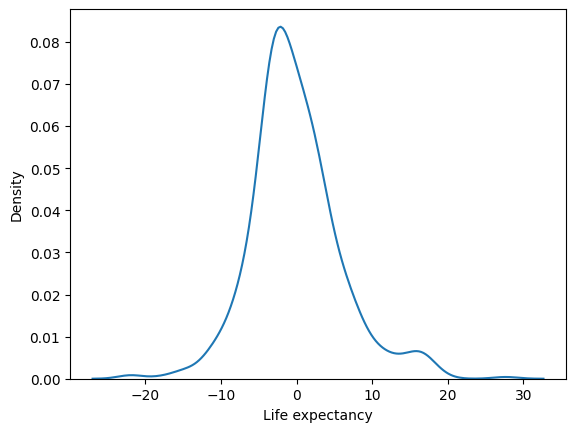

In [ ]:
errors=y_pred-y_test
sns.kdeplot(data=errors)